In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns

# $\begin{aligned} \end{aligned}$
# $\begin{aligned} X &{}= (X + 1)^2  \\&{} = X^2 + 2X + 1 \end{aligned}$
# $\begin{aligned} Z \sim N(0,1) \end{aligned}$

# 두 모집단 모평균 차이에 대한 검정

##  0. one poplulation 
```python
import scipy.stats as stats
test_statistic, p_value = stats.ttest_1samp(sample, popmean=mean)
```
## 1. two independent population and known having equal variance
> $\forall{n_1, n_2} \in N$

```python
import scipy.stats as stats
test_statistic, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=True)
```

## 2. two independent population and unknown having equal variance
> $\forall{n_1, n_2} \in N$

```python
import scipy.stats as stats
test_statistic, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)
```

## 3. paired sample (related)
> $\forall{n} \in N$

```python
import scipy.stats as stats
test_statistic, p_value = stats.ttest_rel(sample_1, sample_2)
```

In [10]:
max_sample_size = 200
min_sample_size = 50

significance_level = 0.05

sample_size_1 = np.random.randint(min_sample_size, max_sample_size)
sample_size_2 = np.random.randint(min_sample_size, max_sample_size)
n1 = sample_size_1
n2 = sample_size_2

population_mean = 173
population_std = 7

max_mean_diff = 2
population_mean_diff = round(np.random.random() * max_mean_diff * 2 - max_mean_diff, 2)

random_seed = 123

sample_1 = stats.norm.rvs(size=n1, loc=population_mean, scale=population_std, random_state=random_seed)
sample_2 = stats.norm.rvs(size=n2, loc=population_mean, scale=population_std, random_state=random_seed)

print(f"n1 = {sample_1.size}")
print(f"n2 = {sample_2.size}")
print()

test_statistic, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=True)
print(f"test_statistic: {test_statistic}")
print(f"p_value: {p_value}")
print()

if p_value > significance_level:
    print(f"{round(p_value,3)} > {round(significance_level, 3)}, H_0 is not rejected")
else:
    print(f"{round(p_value,3)} <= {round(significance_level, 3)}, H_0 is rejected")

n1 = 51
n2 = 143

test_statistic: -0.29642916554896287
p_value: 0.767222754233275

0.767 > 0.05, H_0 is not rejected


# Categorical Data Analysis
## 1. Goodness of fit 
> $\begin{aligned} Suppose\,\,k\,\,is\,\,\#\,\,of\,\,categories,\,\,n=\sum_{i=1}^{k} X_i\end{aligned}$
>
> $\begin{aligned} If\,\,all\,\,k\,\,categories'\,\,ratio\,\,p_i\,\,are\,\,exactly\,\,facts,\,\,\end{aligned}$
>
> $\begin{aligned} \implies X = \sum_{i=1}^{k} \frac{(X_i - np_i)^2}{np_i}\end{aligned}$ ~ $\begin{aligned} \chi^2(k-1)\end{aligned}$

```python
import scipy.stats as stats
chi2_statistic, p_value = stasts.chisquared(observed, expected)
```
---
## 2. Independency
> $\begin{aligned} Suppose\,\,r,c\,\,are\,\,\#\,\,of\,\,rows\,\,and\,\,columns,\,\,n=\sum_{i=1}^{r} \sum_{j=1}^{c} X_{ij}\end{aligned}$
>
> $\begin{aligned} If\,\,two\,\,categorical\,\,random\,\,variables\,\,are\,\,independent,\end{aligned}$
>
> $\begin{aligned} \implies \hat{p_{ij}}=\frac{\sum_{j=1}^{c} X_{ij}}{n} \cdot \frac{\sum_{i=1}^{r} X_{ij}}{n}\end{aligned}$
>
> $\begin{aligned} \implies X = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(X_{ij} - n\hat{p_{ij}})^2}{n\hat{p_{ij}}}\end{aligned}$ ~ $\begin{aligned} \chi^2[(r-1)(c-1)]\end{aligned}$

```python
import scipy.stats as stats
chi2_statistic, p_value = stasts.chi2_contingency(contingency_table)
```

In [8]:
MIN_NUMBER_OF_CATEGORIES=3
MAX_NUMBER_OF_CATEGORIES=10
MAX_COUNT_VALUE=10000
MAX_ERROR_PROB=0.015
MAX_ERROR=round(MAX_COUNT_VALUE * MAX_ERROR_PROB, 0)

significance_level = 0.05

k = np.random.randint(MIN_NUMBER_OF_CATEGORIES, MAX_NUMBER_OF_CATEGORIES)

# Problem Sample Generate -- ratios generate
expected_temp = np.random.randint(0, MAX_COUNT_VALUE, size=k)
ratios = expected_temp / np.sum(expected_temp)


# Observed Generate
observed = list()
for i, expected_value in enumerate(expected_temp):
    observed_value=np.random.randint(max(0, expected_value - MAX_ERROR), expected_value + MAX_ERROR)
    observed.append(observed_value)

n = np.sum(observed)

# Expected
expected = ratios * n

# Goodness of fit Test
chi2_statistic, p_value = stats.chisquare(observed, expected)

print(f"n = {n}")
print(f"ratios = {ratios.round(3).tolist()}")
print(f"expected = {expected.round(0).astype('int').tolist()}")
print(f"observed = {observed}")
print()
print(f"chi2_statistic = {chi2_statistic}")
print(f"p_value = {p_value}")
print()

if p_value > significance_level:
    print(f"{round(p_value,3)} > {round(significance_level, 3)}, H_0 is not rejected ==> Goodness of fit Test Successed")
else:
    print(f"{round(p_value,3)} <= {round(significance_level, 3)}, H_0 is rejected ==> Goodness of fit Test Failed")

n = 31818
ratios = [0.285, 0.13, 0.088, 0.018, 0.143, 0.225, 0.099, 0.011]
expected = [9060, 4152, 2815, 582, 4548, 7152, 3152, 357]
observed = [9128, 4227, 2831, 542, 4426, 7225, 3017, 422]

chi2_statistic = 26.45699277563255
p_value = 0.0004172074368877547

0.0 <= 0.05, H_0 is rejected ==> Goodness of fit Test Failed


In [ ]:
MIN_ROW_COUNT=30
MAX_ROW_COUNT=100
MIN_COL_COUNT=30
MAX_COL_COUNT=100
SCALE=100
MAX_ERROR_PROB=0.17

significance_level = 0.05

r = np.random.randint(MIN_ROW_COUNT,MAX_ROW_COUNT)
c = np.random.randint(MIN_COL_COUNT,MAX_COL_COUNT)

prob_row = np.random.randint(1, 101, size=r)
prob_row = prob_row / prob_row.sum()

prob_col = np.random.randint(1, 101, size=c)
prob_col = prob_col / prob_col.sum()

X = np.arange(0, r*c).reshape(r,c)

n = r * c * SCALE;
for row, row_arr in enumerate(X):
    for col, value in enumerate(row_arr):
        expected_value = n * prob_row[row] * prob_col[col]
        X[row][col] = np.random.randint(max(1, int(expected_value * (1 - MAX_ERROR_PROB))), int(expected_value * (1 + MAX_ERROR_PROB) + 2))

chi2_statistic, p_value, dof, expected = stats.chi2_contingency(X)


print(f"row = {row}, col = {col}")
print(f"n = {n}")
print(f"X =\n{X}")
print(f"expected =\n{expected.astype('int')}")
print()
print(f"chi2_statistic = {chi2_statistic}")
print(f"p_value = {p_value}")
print(f"dof = {dof}, (r - 1) * (c - 1) = {(r - 1) * (c - 1)}")
print()

if p_value > significance_level:
    print(f"{round(p_value,3)} > {round(significance_level, 3)}, H_0 is not rejected ==> Independency Test Successed")
else:
    print(f"{round(p_value,3)} <= {round(significance_level, 3)}, H_0 is rejected ==> Independency Test Failed")

# ANOVA (Analysis of Variance) : 분산분석
## One Way ANOVA
> $\begin{aligned} k\,:\,\,\#\,\,of\,\,treatments\end{aligned}$
>
> $\begin{aligned} n\,:\,\,sample\,\,size \end{aligned}$
>
> $\begin{aligned} N = n \cdot k \end{aligned}$
>
> $\begin{aligned} \bar{y_{i}}=\frac{\sum_{j=1}^{n} y_{ij}}{n} \end{aligned}$
>
> $\begin{aligned} \bar{y}=\frac{\sum_{i=1}^{k}\sum_{j=1}^{n} y_{ij}}{N} \end{aligned}$
>
> $\begin{aligned} Suppose\,\,\,&{}Y_{ij}=\mu+\tau_{i}+\epsilon_{ij} \\&{} \sum_{i=1}^{k} \tau_{i}=0 \\&{}\epsilon_{ij} \sim N(0,\sigma^2)  \end{aligned}$ 
>
> $\begin{aligned} \implies Y_{ij} \sim N(\mu+\tau_{i},\sigma^2) \end{aligned}$

## SST (Sum of Squares Total)
> $\begin{aligned} SST=\sum_{i=1}^{k} \sum_{j=1}^{n} (y_{ij}-\bar{y})^2 \end{aligned}$

## SSTR (Sum of Squares Treatment)
> $\begin{aligned} SSTR=\sum_{i=1}^{k} \sum_{j=1}^{n} (\bar{y_{i}}-\bar{y})^2 =  n \cdot \sum_{i=1}^{k} (\bar{y_{i}}-\bar{y})^2\end{aligned}$

## SSTR (Sum of Squares Error)
> $\begin{aligned} SSE=\sum_{i=1}^{k} \sum_{j=1}^{n} (y_{ij}-\bar{y_{i}})^2 \end{aligned}$

> $\begin{aligned} SST = SSTR + SSE \end{aligned}$

## Mean Sqaure Statistic
> $\begin{aligned} MSTR = \frac{SSTR}{k - 1}\end{aligned}$
>
> $\begin{aligned} MSE = \frac{SSE}{N - k}\end{aligned}$
>
> $\begin{aligned} F = \frac{MSTR}{MSE} \sim F(k-1,N-k)\end{aligned}$

## Python Example Code
```python
import scipy.stats as stats
chi2_statistic, p_value = stasts.chisquared(observed, expected)
```
---
2. Independency
>
>
> $\begin{aligned} Suppose\,\,r,c\,\,are\,\,\#\,\,of\,\,rows\,\,and\,\,columns,\,\,n=\sum_{i=1}^{r} \sum_{j=1}^{c} X_{ij}\end{aligned}$
>
> $\begin{aligned} If\,\,two\,\,categorical\,\,random\,\,variables\,\,are\,\,independent,\end{aligned}$
>
> $\begin{aligned} \implies \hat{p_{ij}}=\frac{\sum_{j=1}^{c} X_{ij}}{n} \cdot \frac{\sum_{i=1}^{r} X_{ij}}{n}\end{aligned}$
>
> $\begin{aligned} \implies X = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(X_{ij} - n\hat{p_{ij}})^2}{n\hat{p_{ij}}}\end{aligned}$ ~ $\begin{aligned} \chi^2[(r-1)(c-1)]\end{aligned}$

```python
import scipy.stats as stats
chi2_statistic, p_value = stasts.chi2_contingency(contingency_table)
```

             df  sum_sq   mean_sq         F    PR(>F)
treatment   4.0   13.68  3.420000  0.625356  0.646851
Residual   45.0  246.10  5.468889       NaN       NaN


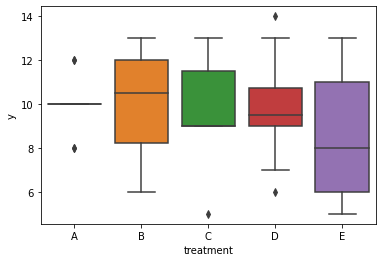

In [50]:
population_mean = 10
population_std = 2
sample_size = 10
treatment_count = 5


treatments = [chr(c) for c in ord('A') + np.arange(treatment_count)]

data_table = {"y": [], "treatment": np.repeat(treatments, sample_size).tolist()}

for i, treatment in enumerate(treatments):
    data_table["y"].extend(stats.norm.rvs(loc=population_mean, scale=population_std, size=sample_size).astype('int').tolist())


df = pd.DataFrame(data_table)
lm = smf.ols('y ~ treatment', data=data_table).fit()
# lm.summary()

sns.boxplot(data=df, x='treatment', y='y', orient='v')

# return DataFrame
print(sms.anova_lm(lm))
stats.normaltest()

# Correlation Analysis (상관분석)
## 1. Person (피어슨 상관계수)
```python
import scipy.stats as stats
correlation_statistic, p_value = stats.parsonr(data1, data2)
```

## 2. Spearman (스피어만 상관계수)
> using data __order__

```python
import scipy.stats as stats
correlation_statistic, p_value = stats.spearmanr(data1, data2)
```

## 3. Kendall Tau (켄달타우 상관계수)
> using data __order__

```python
import scipy.stats as stats
correlation_statistic, p_value = stats.kendalltau(data1, data2)
```

In [62]:
df = pd.read_csv("../data/linear_regression_01.csv")


correlation_statistic, p_value = stats.pearsonr(df.iloc[:,0], df.iloc[:,1])
print("Pearson")
print(f"correlation_statistic : {correlation_statistic}")
print(f"p_value : {p_value}")
print()

correlation_statistic, p_value = stats.spearmanr(df.iloc[:,0], df.iloc[:,1])
print("Spearman")
print(f"correlation_statistic : {correlation_statistic}")
print(f"p_value : {p_value}")
print()

correlation_statistic, p_value = stats.kendalltau(df.iloc[:,0], df.iloc[:,1])
print("Kendall-tau")
print(f"correlation_statistic : {correlation_statistic}")
print(f"p_value : {p_value}")
print()

Pearson
correlation_statistic : 0.3591101808835043
p_value : 0.08481941563897465

Spearman
correlation_statistic : 0.4100930210379258
p_value : 0.04655561808967115

Kendall-tau
correlation_statistic : 0.3833194738921656
p_value : 0.02097298484359096



In [3]:
stats.chisquare()